<a href="https://colab.research.google.com/github/Shantanugoyal00/Credit_Card_Fraud_Detection-FOSC/blob/main/CREDIT_CARD_CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection using CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as pylt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:02<00:00, 23.9MB/s]
100% 66.0M/66.0M [00:02<00:00, 24.3MB/s]


In [ ]:
! unzip creditcardfraud

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

import warnings as wrng
wrng.filterwarnings("ignore")
plt.figure(filesize=(12,6))
sns.countplot(data["Class"])

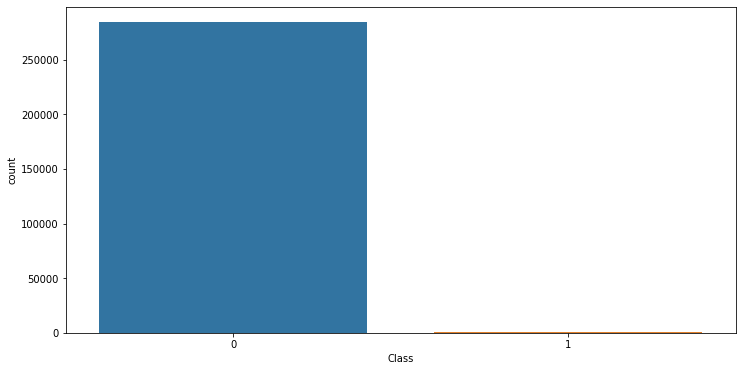

In [ ]:
import warnings as wrng
wrng.filterwarnings("ignore")
pylt.figure(figsize=(12,6))
sns.countplot(data["Class"])

### Balance Dataset 

In [ ]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [ ]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,120707.0,-1.929280,0.179190,-1.524234,0.728142,1.779941,-0.738540,1.486861,-0.522898,-0.108906,...,-0.191456,0.477060,0.643578,0.587612,0.439452,-0.633789,-0.661845,0.257413,50.57,0
980,117694.0,1.768002,-0.912038,-1.650500,-0.420553,1.423205,4.033393,-1.600418,1.190862,1.344622,...,0.190364,0.445949,0.189102,0.640561,-0.536210,0.524341,0.031902,0.003719,92.40,0
981,37901.0,-2.675689,-1.005687,2.002295,0.538870,1.400861,0.396696,0.248362,-0.527428,0.811113,...,-0.345788,0.397570,-0.661434,-0.144777,0.110089,0.598569,-1.066019,0.281842,60.00,0
982,51840.0,-1.959866,0.677107,0.820685,-1.382464,0.026193,-0.619171,0.064689,-0.228891,-1.163240,...,-0.177902,-0.438260,-0.039308,-0.516998,0.293095,-0.487595,-0.999659,-0.256904,12.00,0


In [ ]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
X = data.drop('Class',axis=1)
Y = data['Class']

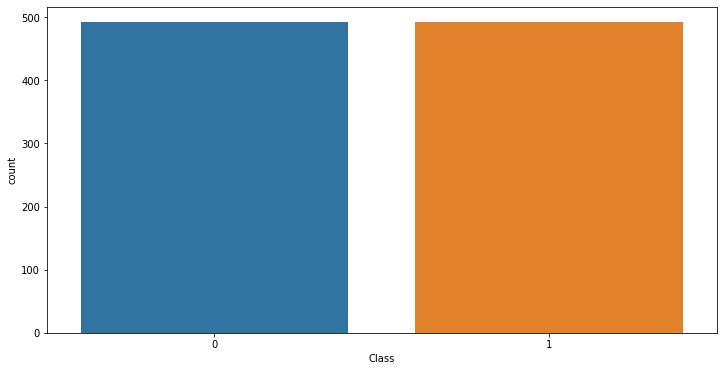

In [ ]:
pylt.figure(figsize=(12,6))
sns.countplot(Y)

In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape

(787, 30)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN 

In [ ]:
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.9871 - accuracy: 0.6442 - val_loss: 0.6298 - val_accuracy: 0.7919
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5994 - accuracy: 0.7929 - val_loss: 0.5727 - val_accuracy: 0.8528
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8272 - val_loss: 0.5364 - val_accuracy: 0.8832
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4376 - accuracy: 0.8564 - val_loss: 0.4992 - val_accuracy: 0.8985
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3574 - accuracy: 0.8679 - val_loss: 0.4665 - val_accuracy: 0.9188
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3619 - accuracy: 0.8755 - val_loss: 0.4410 - val_accuracy: 0.8883
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3428 - accuracy: 0.8679 - val_loss: 0.4055 - val_accuracy: 0.8985
Epoch 8/100


In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  pylt.plot(epoch_range, history.history['accuracy'])
  pylt.plot(epoch_range, history.history['val_accuracy'])
  pylt.title('Model accuracy')
  pylt.ylabel('Accuracy')
  pylt.xlabel('Epoch')
  pylt.legend(['Train', 'Val'], loc='upper left')
  pylt.show()

  # Plot training & validation loss values
  pylt.plot(epoch_range, history.history['loss'])
  pylt.plot(epoch_range, history.history['val_loss'])
  pylt.title('Model loss')
  pylt.ylabel('Loss')
  pylt.xlabel('Epoch')
  pylt.legend(['Train', 'Val'], loc='upper left')
  pylt.show()

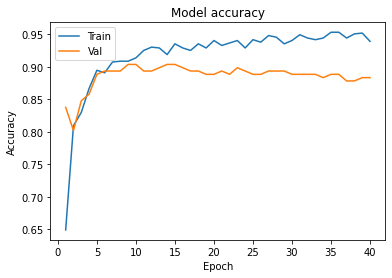

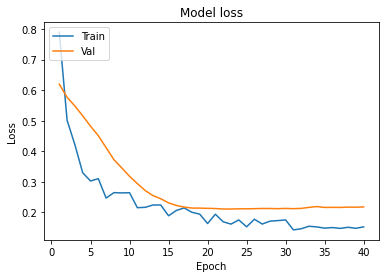

In [ ]:
plot_learningCurve(history, epochs)